<a href="https://colab.research.google.com/github/ozakbas/CS412-Machine-Learning/blob/main/HW/ML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 412 Machine Learning 2020 

# Assignment 1

100 pts

## Goal 

The goal of this assignment 

*  Introduction to the machine learning experimental set up
*  Gain experience with the Scikit library
*  Gain experience with Decision tree and k-NN models

## Dataset

**Wine Quality Dataset** is a collection red and white wines with 12 attributes. The target variable is the 'quality' either 0 or 1


## Task
Build a decision tree and k-NN classifiers with the scikit-learn library function calls to **classify** the quality of wine as good (1) and bad (0)

## Submission

Follow the instructions at the end.

# 1) Initialize

First, make a copy of this notebook in your drive

In [1]:
# Mount to your drive, in this way you can reach files that are in your drive
# Run this cell

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2) Load Dataset
To start working for your homework, take a copy of the folder, given in the below link to your own google drive. You find the train and test data under this folder.

https://drive.google.com/drive/folders/1PC6M332CTdW-OOrgJ-1GU1F3UaRupka8?usp=sharing

After copy the folder, copy the path of the train and test dataset to paste them in the below cell to load your data.

In [2]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/drive/My Drive/Recitation/winequality-train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Recitation/winequality-test.csv')

# 3) Understand the dataset

You can use the fuctions that we saw in the recitations to understand the dataset

In [3]:
# print shape of the train and test sets
print('Train shape: ', train_df.shape)
print('Test shape: ', test_df.shape)

# show random samples from the training data
train_df.head()

Train shape:  (5198, 13)
Test shape:  (1299, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality
0,6.1,0.32,0.24,1.5,0.036,38.0,124.0,0.98980,3.29,0.42,12.4,0,1
1,8.8,0.20,0.28,1.1,0.018,18.0,72.0,0.99260,2.97,0.35,10.4,0,0
2,6.1,0.21,0.30,6.3,0.039,47.0,136.0,0.99068,3.27,0.31,12.7,0,0
3,8.8,0.17,0.38,1.8,0.040,39.0,148.0,0.99420,3.16,0.67,10.2,0,0
4,11.5,0.42,0.48,2.6,0.077,8.0,20.0,0.99852,3.09,0.53,11.0,1,0


In [4]:
# print information about the datasets (Is there any missing value? or Categorical feature?)
print(train_df.info())
print(train_df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5198 non-null   float64
 1   volatile acidity      5198 non-null   float64
 2   citric acid           5198 non-null   float64
 3   residual sugar        5198 non-null   float64
 4   chlorides             5198 non-null   float64
 5   free sulfur dioxide   5198 non-null   float64
 6   total sulfur dioxide  5198 non-null   float64
 7   density               5198 non-null   float64
 8   pH                    5198 non-null   float64
 9   sulphates             5198 non-null   float64
 10  alcohol               5198 non-null   float64
 11  wine type             5198 non-null   int64  
 12  quality               5198 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 528.0 KB
None
fixed acidity           False
volatile acidity        False
citric aci

# 4) Define train and test labels

In [5]:
# make sure you remove the labels from datasets

train_labels = train_df.pop('quality')
test_labels = test_df.pop('quality')

# 5) FineTune Decision Tree hyper-parameters

1-Splitting dataset into train and validation

In [6]:
# Split training data to 70% training and 30% validation, do not forget to use the random_state parameter
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_df, train_labels, test_size=0.3, random_state=12)

2- FineTune minimum sample split

In [7]:
from sklearn.tree import DecisionTreeClassifier

min_samples_splits = range(2, 50)

train_results = []
val_results = []
for min_samples_split in min_samples_splits:

  # Fit the tree using the 70% portion of the training data
  clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=2021)
  clf.fit(x_train, y_train)
  
  # Evaluate on Training set
  train_acc = clf.score(x_train, y_train)
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_acc = clf.score(x_val, y_val)
  val_results.append(val_acc)

  print("min_sample_splits: {} train: {} val: {}".format(min_samples_split, train_acc, val_acc))

min_sample_splits: 2 train: 1.0 val: 0.8128205128205128
min_sample_splits: 3 train: 0.9939527212754261 val: 0.8173076923076923
min_sample_splits: 4 train: 0.9873556899395272 val: 0.8173076923076923
min_sample_splits: 5 train: 0.9813084112149533 val: 0.8243589743589743
min_sample_splits: 6 train: 0.9752611324903794 val: 0.8179487179487179
min_sample_splits: 7 train: 0.9681143485431556 val: 0.8217948717948718
min_sample_splits: 8 train: 0.9615173172072567 val: 0.823076923076923
min_sample_splits: 9 train: 0.9565695437053326 val: 0.8153846153846154
min_sample_splits: 10 train: 0.951346893897746 val: 0.8153846153846154
min_sample_splits: 11 train: 0.945849367784497 val: 0.8147435897435897
min_sample_splits: 12 train: 0.9414513468938978 val: 0.8032051282051282
min_sample_splits: 13 train: 0.9384277075316108 val: 0.8102564102564103
min_sample_splits: 14 train: 0.934304562946674 val: 0.808974358974359
min_sample_splits: 15 train: 0.9315557998900494 val: 0.8153846153846154
min_sample_splits: 1

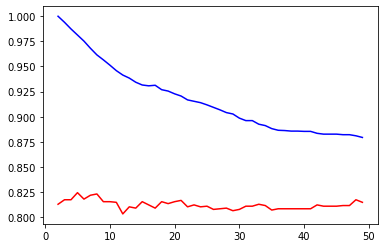

In [8]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [9]:
min_samples_splits[np.argmax(val_results)]

5

In [10]:
# Choose the best minimum split sample based on the plot
Best_minSampl = min_samples_splits[np.argmax(val_results)]

# Train decision tree using the full training data and the best minimum split sample
best_tree = DecisionTreeClassifier(min_samples_split=Best_minSampl, random_state=2021)
best_tree.fit(train_df, train_labels)

# Estimate the prediction of the test data
test_pred = best_tree.predict(test_df)

from sklearn.metrics import accuracy_score
# Calculate accuracy of test data
TestAcc = accuracy_score(test_pred, test_labels)
print("Testing Accuracy = %.4f%%" % (TestAcc * 100))

Testing Accuracy = 82.6790%


# 6) Apply the same procedure but using k-NN instead of decision tree

For finetuning, find the best value of K to use with this dataset.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from statistics import mean

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = list(range(1, 30, 2))

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
  # Follow what we did in decision tree part
  clf = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(clf, train_df, train_labels, cv=5)
  accuracies.append(mean(scores))

print("n_neighbors best:", kVals[np.argmax(accuracies)])
print("Best Validation Accuracy = %.4f%%" % (np.max(accuracies)*100))

n_neighbors best: 1
Best Validation Accuracy = 81.1854%


In [12]:
# Train k-NN using the full training data with the best K that you found
best_knn = KNeighborsClassifier(n_neighbors=kVals[np.argmax(accuracies)])
best_knn.fit(train_df, train_labels)

preds = best_knn.predict(test_df)
accuracy = accuracy_score(test_labels, preds)
print(accuracy)

# Testing

0.8329484218629715


# Report
We need to classify wines as good or bad quality according to their given 12 numeric values. We will use decision trees and k-Nearest-Neighbors classifiers.

We explored the data by looking at the dataframe's shape, head, and info. There were no categorical features, so we don't need any encoding. We also checked if there are any null values in the dataset, and there were none. As a result, there was no need for preprocessing.

We need a validation set for tuning the hyperparameters. We split the training dataset into two random arrays (training set and validation sets) using sci-kit learn's train_test_split method. We have used a random state to create a reproducible output and give test size as 0.3 to have 70% training and 30% validation sets.

We have obtained the best results with the Decision Tree classifier with min_samples_splits = 5, giving classification accuracy of 82.679% on test data. We have obtained the best results with the kNN classifier with n_neighbors = 1, giving classification accuracy of 83.294% on test data.

kNN needs to scan the dataset every time prediction is required; that's why it was slower than decision tree.